In [1]:
import spotipy
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import os
%matplotlib inline

In [2]:
from spotipy.oauth2 import SpotifyClientCredentials

In [3]:
client_id = os.environ.get('client_id')
client_secret = os.environ.get('client_secret')

In [4]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

In [5]:
#get recommendations data
rr = sp.recommendations(seed_artists='', seed_tracks=['5xrtzzzikpG3BLbo4q1Yul'], seed_genres=[], limit=5) #LILAC by IU as a test

In [16]:
song = 'Lilac iu'
s = sp.search(q='track:'+song, type='track')
preview = s['tracks']['items'][0]['preview_url']
preview

'https://p.scdn.co/mp3-preview/c319bedc9815f9b0defe289b07e581602e577781?cid=01892ea76c2a4e8fb545b4b699988845'

In [10]:
s

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3ALilac+iu&type=track&offset=0&limit=10',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3HqSLMAZ3g3d5poNaI7GOU'},
       'href': 'https://api.spotify.com/v1/artists/3HqSLMAZ3g3d5poNaI7GOU',
       'id': '3HqSLMAZ3g3d5poNaI7GOU',
       'name': 'IU',
       'type': 'artist',
       'uri': 'spotify:artist:3HqSLMAZ3g3d5poNaI7GOU'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE',
      'BF',
      'BG',
      'BH',
      'BI',
      'BJ',
      'BN',
      'BO',
      'BR',
      'BS',
      'BT',
      'BW',
      'BY',
      'BZ',
      'CA',
      'CH',
      'CI',
      'CL',
      'CM',
      'CO',
      'CR',
      'CV',
      'CW',
      'CY',
      'CZ',
      'DE',
      'DJ',
      'DK',
      'D

In [61]:
#get features
feat = sp.audio_features(tracks=['3iYNJX4FTRGlfMQySjlGNr']) #Future Nostalgia - Dua Lipa as a test 
feat

[{'danceability': 0.875,
  'energy': 0.813,
  'key': 7,
  'loudness': -4.502,
  'mode': 1,
  'speechiness': 0.0579,
  'acousticness': 0.00618,
  'instrumentalness': 0,
  'liveness': 0.321,
  'valence': 0.859,
  'tempo': 114.993,
  'type': 'audio_features',
  'id': '3iYNJX4FTRGlfMQySjlGNr',
  'uri': 'spotify:track:3iYNJX4FTRGlfMQySjlGNr',
  'track_href': 'https://api.spotify.com/v1/tracks/3iYNJX4FTRGlfMQySjlGNr',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3iYNJX4FTRGlfMQySjlGNr',
  'duration_ms': 184882,
  'time_signature': 4}]

In [8]:
features = feat[0] #get first item in map

In [9]:
p = pd.Series(features).to_frame() #go from series --> dataframe

In [29]:
data_feat = p.loc[['danceability','energy','speechiness','acousticness','valence','liveness']]
bpm = p.loc[['tempo']]
f = bpm.values[0]
f.item()

114.993

In [21]:
#generating the graph in matplotlib 



Text(0.5, 1.0, 'Spotify Song Feature for ')

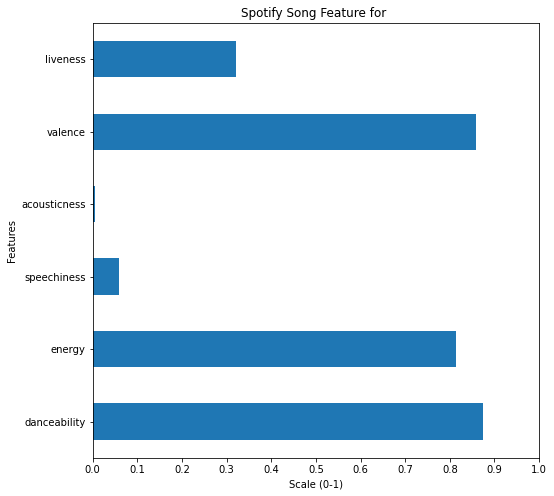

In [27]:
colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b'] #colors seem useless here
song = ''
ticks = np.linspace(0,1,11)
plot = data_feat.plot.barh(figsize=(8,8),xticks=ticks,legend=False)
plot.set_xlabel('Scale (0-1)')
plot.set_ylabel('Features')
plot.set_title(f'Spotify Song Feature for {song}')